<ipython-input-5-30d866651736>:37: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolor='k', s=20, marker='x', label='Testing Data')
<ipython-input-5-30d866651736>:37: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolor='k', s=20, marker='x', label='Testing Data')
<ipython-input-5-30d866651736>:37: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=p

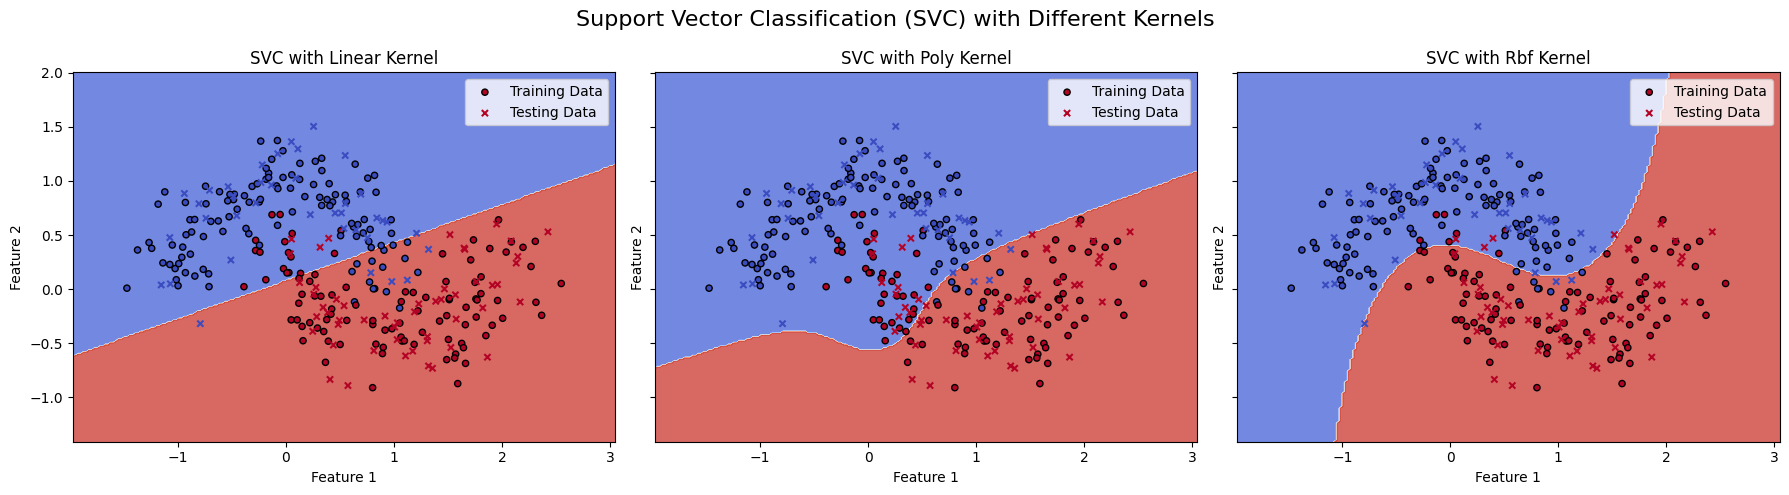

In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Generate a non-linearly separable dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize SVC models with different kernels
kernels = ['linear', 'poly', 'rbf']
models = {kernel: SVC(kernel=kernel, C=1, gamma=0.5, degree=3) for kernel in kernels}

# Plot decision boundaries for each kernel
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for i, kernel in enumerate(kernels):
    model = models[kernel]
    model.fit(X_train, y_train)

    # Create a mesh grid for plotting decision boundaries
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Predict on the grid to create decision boundary
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and data points
    axes[i].contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    axes[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k', s=20, label='Training Data')
    axes[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolor='k', s=20, marker='x', label='Testing Data')
    axes[i].set_title(f'SVC with {kernel.capitalize()} Kernel')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')
    axes[i].legend()

plt.suptitle("Support Vector Classification (SVC) with Different Kernels", fontsize=16)
plt.tight_layout()
plt.show()